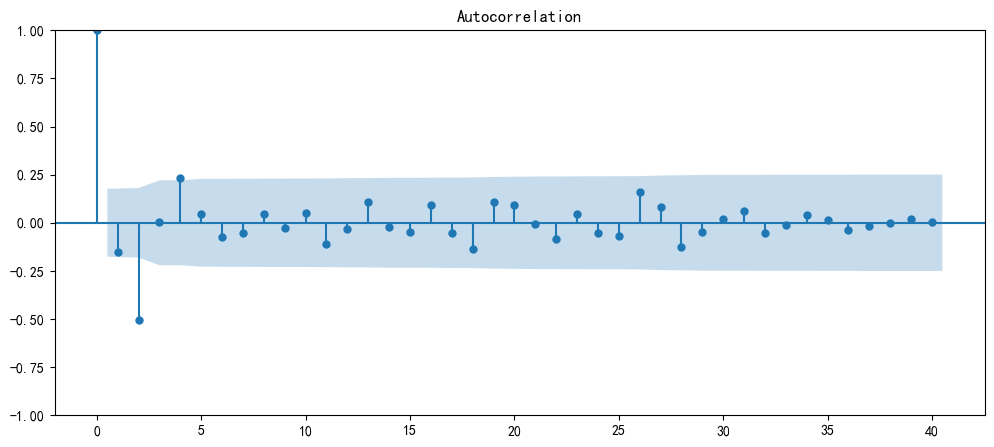

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import statsmodels.api as sm

# 设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取时间序列数据
file_path = './updated_file.xlsx'
df = pd.read_excel(file_path)

# 选择时间序列数据
time_series = df.iloc[:, 2]  # 第三列是数据
time_series.index = pd.RangeIndex(start=1, stop=len(time_series) + 1, step=1)

# 划分数据集，70% 作为训练集，30% 作为验证集
train_size = int(len(time_series) * 0.7)
train, test = time_series[:train_size], time_series[train_size:]



p = 1
d = 1
q = 0

model = sm.tsa.ARIMA(train, order =(p,d,q))
results = model.fit()
resid = results.resid

fig , ax  = plt.subplots(figsize =(12,5))
ax = sm.graphics.tsa.plot_acf(resid, lags=40, ax= ax)
plt.show()




In [38]:
predict_sunspots = results.predict(dynamic = False)
print(predict_sunspots)

1      0.000000e+00
2      0.000000e+00
3      6.974876e-01
4      3.025124e-01
5     -7.356541e-16
           ...     
119    9.394975e+00
120    7.907537e+00
121    1.397488e+01
122    2.188241e+01
123    1.632764e+01
Name: predicted_mean, Length: 123, dtype: float64


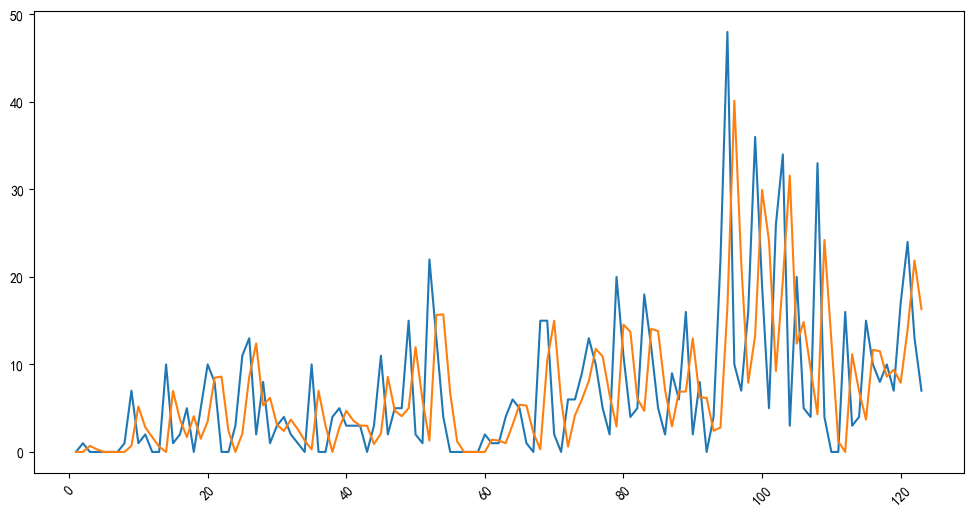

In [39]:
plt.figure(figsize=(12,6))
plt.plot(train)
plt.xticks(rotation=45)
plt.plot(predict_sunspots)
plt.show()